# HW7 APIs - MTA API 

#### Authors: Ling Lin, Xuanyu Lu, Qingyang Xiao

Reference: https://github.com/nolanbconaway/underground

In [1]:
import os

from underground import metadata, SubwayFeed #get metadata and SubwayFeed function


In [2]:
API_KEY = '01963ec1af3debf61e88968928b647c2' 

ROUTE = 'Q' #the route information we want to see

#API_KEY = '5H3pxsm5LT8OwtBs9LWoWaNGf0j67zER1dxQL214'
#ROUTE = 'Q'


In [3]:
FEED_ID = metadata.get_feed_id(ROUTE) #get route Feed

In [4]:
feed = SubwayFeed.get(FEED_ID, api_key=API_KEY)
#feed = SubwayFeed.get(ROUTE, api_key=API_KEY)

In [5]:
q_train_stops = feed.extract_stop_dict()[ROUTE] #get route raw data of stops_id and expected arrival time

In [6]:
q_train_stops #print q train information

{'D34S': [datetime.datetime(2020, 4, 8, 1, 0, 41, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 30, 32, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 54, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 2, 14, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
 'D35S': [datetime.datetime(2020, 4, 8, 1, 2, 41, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 32, 32, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 56, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 2, 16, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)],
 'D37S': [datetime.datetime(2020, 4, 8, 1, 5, 11, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>),
  datetime.datetime(2020, 4, 8, 1, 35, 2, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 

### Transform online data into python dataframe

References Used:
1. https://thispointer.com/pandas-convert-dataframe-index-into-column-using-dataframe-reset_index-in-python/
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
3. https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842
4. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

In [7]:
import pandas as pd

In [8]:
# Convert online data from dictionary format into python dataframe

Schedule = pd.DataFrame.from_dict(q_train_stops, orient='index')

In [9]:
# Uncomment to see what the original dataframe looks like

Schedule

,0,1,2,3
D34S,2020-04-08 01:00:41-04:00,2020-04-08 01:30:32-04:00,2020-04-08 01:54:00-04:00,2020-04-08 02:14:00-04:00
D35S,2020-04-08 01:02:41-04:00,2020-04-08 01:32:32-04:00,2020-04-08 01:56:00-04:00,2020-04-08 02:16:00-04:00
D37S,2020-04-08 01:05:11-04:00,2020-04-08 01:35:02-04:00,2020-04-08 01:58:30-04:00,2020-04-08 02:18:30-04:00
D38S,2020-04-08 01:06:11-04:00,2020-04-08 01:36:02-04:00,2020-04-08 01:59:30-04:00,2020-04-08 02:19:30-04:00
D39S,2020-04-08 01:08:41-04:00,2020-04-08 01:38:32-04:00,2020-04-08 02:02:00-04:00,2020-04-08 02:22:00-04:00
...,...,...,...,...
R16S,2020-04-08 01:17:00-04:00,2020-04-08 01:37:00-04:00,NaT,NaT
R17S,2020-04-08 01:18:30-04:00,2020-04-08 01:38:30-04:00,NaT,NaT
R18S,2020-04-08 01:19:30-04:00,2020-04-08 01:39:30-04:00,NaT,NaT
R19S,2020-04-08 01:20:30-04:00,2020-04-08 01:40:30-04:00,NaT,NaT


In [10]:
# Add the index to be a new column in dataframe
# The original index is stop_id, so add stop_id to be a new column of dataframe

Schedule1 = Schedule.reset_index()

# Rename the newly added column as "stop_id"
Schedule2 = Schedule1.rename(columns={'index':'stop_id'})


# Read the last character of stop_id to identify the direction, N represents North, S represents South
Direction = []

for i in range(0, len(Schedule)):
    Direction.append(Schedule2.stop_id[i][-1])
        
# Direction

# Insert the new direction column to a specific postion, e.g. position 1 in this case
# Do not run this code the second time without rerun the above codes, 
# because it will appear an error if the column is already inserted 

Schedule2.insert(1, 'direction', Direction)

# Extract date information from the Timestamp column, create a new column and insert it to position 2
Schedule2.insert(2, 'date', Schedule2[0].dt.date)


# Another way of adding a new column to dataframe, but no specific position
# Schedule2['direction'] = Direction
# Schedule2['date'] = Schedule2[0].dt.date


# Replace the original Timestamp columns (Timestamp shows date and time) with time only

for j in range(0, len(Schedule2)):                # loop through rows
    for k in range(3, len(Schedule2.iloc[0])):       # loop through columns 
        if pd.notna(Schedule2.iloc[j, k]):              # Checking for missing value
            Schedule2.iloc[j, k] = pd.Timestamp.time(Schedule2.iloc[j, k])
            
            
# Another approach, work with dataframe that doesn't have NAs 
# Schedule2[0] = Schedule2[0].dt.time


In [11]:
# Uncomment to see what the new dataframe looks like now

Schedule2

,stop_id,direction,date,0,1,2,3
0,D34S,S,2020-04-08,01:00:41,01:30:32,01:54:00,02:14:00
1,D35S,S,2020-04-08,01:02:41,01:32:32,01:56:00,02:16:00
2,D37S,S,2020-04-08,01:05:11,01:35:02,01:58:30,02:18:30
3,D38S,S,2020-04-08,01:06:11,01:36:02,01:59:30,02:19:30
4,D39S,S,2020-04-08,01:08:41,01:38:32,02:02:00,02:22:00
...,...,...,...,...,...,...,...
63,R16S,S,2020-04-08,01:17:00,01:37:00,NaT,NaT
64,R17S,S,2020-04-08,01:18:30,01:38:30,NaT,NaT
65,R18S,S,2020-04-08,01:19:30,01:39:30,NaT,NaT
66,R19S,S,2020-04-08,01:20:30,01:40:30,NaT,NaT


<font size='4' color='red'>Qingyang part</font>

In [12]:
sch_df = Schedule2

In [13]:
#show top 10 time nearest station info
sch_df.head(10)

,stop_id,direction,date,0,1,2,3
0,D34S,S,2020-04-08,01:00:41,01:30:32,01:54:00,02:14:00
1,D35S,S,2020-04-08,01:02:41,01:32:32,01:56:00,02:16:00
2,D37S,S,2020-04-08,01:05:11,01:35:02,01:58:30,02:18:30
3,D38S,S,2020-04-08,01:06:11,01:36:02,01:59:30,02:19:30
4,D39S,S,2020-04-08,01:08:41,01:38:32,02:02:00,02:22:00
5,D40S,S,2020-04-08,01:11:11,01:41:02,02:04:30,02:24:30
6,D41S,S,2020-04-08,01:13:41,01:43:32,02:07:00,02:27:00
7,D42S,S,2020-04-08,01:15:41,01:45:32,02:09:00,02:29:00
8,D43S,S,2020-04-08,01:17:11,01:47:02,02:10:30,02:30:30
9,D28N,N,2020-04-08,01:00:02,01:23:00,01:43:00,NaT


In [14]:
for i in range(10):
    sch_df.iloc[i]['stop_id']

In [15]:
#find top 10 time nearest stops
stop = []
for i in range(20):
    stop.append(sch_df.iloc[i]['stop_id'])
#stop = [sch_df.iloc[0]['stop_id'],sch_df.iloc[1]['stop_id']]
print(stop)
#stop = list.append('sch_df.iloc[0]['stop_id']')

['D34S', 'D35S', 'D37S', 'D38S', 'D39S', 'D40S', 'D41S', 'D42S', 'D43S', 'D28N', 'D27N', 'D26N', 'D25N', 'D24N', 'R30N', 'Q01N', 'R22N', 'R21N', 'R20N', 'R19N']


In [16]:
!more stops.txt

stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
101,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,1,
101N,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,0,101
101S,,Van Cortlandt Park - 242 St,,40.889248,-73.898583,,,0,101
103,,238 St,,40.884667,-73.90087,,,1,
103N,,238 St,,40.884667,-73.90087,,,0,103
103S,,238 St,,40.884667,-73.90087,,,0,103
104,,231 St,,40.878856,-73.904834,,,1,
104N,,231 St,,40.878856,-73.904834,,,0,104
104S,,231 St,,40.878856,-73.904834,,,0,104
106,,Marble Hill - 225 St,,40.874561,-73.909831,,,1,
106N,,Marble Hill - 225 St,,40.874561,-73.909831,,,0,106
106S,,Marble Hill - 225 St,,40.874561,-73.909831,,,0,106
107,,215 St,,40.869444,-73.915279,,,1,
107N,,215 St,,40.869444,-73.915279,,,0,107
107S,,215 St,,40.869444,-73.915279,,,0,107
108,,207 St,,40.864621,-73.918822,,,1,
108N,,207 St,,40.864621,-73.918822,,,0,108
108S,,207 St,,40.864621,-73.918822,,,0,108
109,,Dyckman St,,40.860531,-73.925536,,,1,
109

414N,,161 St - Yankee Stadium,,40.827994,-73.925831,,,0,414
414S,,161 St - Yankee Stadium,,40.827994,-73.925831,,,0,414
415,,149 St - Grand Concourse,,40.818375,-73.927351,,,1,
415N,,149 St - Grand Concourse,,40.818375,-73.927351,,,0,415
415S,,149 St - Grand Concourse,,40.818375,-73.927351,,,0,415
416,,138 St - Grand Concourse,,40.813224,-73.929849,,,1,
416N,,138 St - Grand Concourse,,40.813224,-73.929849,,,0,416
416S,,138 St - Grand Concourse,,40.813224,-73.929849,,,0,416
418,,Fulton St,,40.710368,-74.009509,,,1,
418N,,Fulton St,,40.710368,-74.009509,,,0,418
418S,,Fulton St,,40.710368,-74.009509,,,0,418
419,,Wall St,,40.707557,-74.011862,,,1,
419N,,Wall St,,40.707557,-74.011862,,,0,419
419S,,Wall St,,40.707557,-74.011862,,,0,419
420,,Bowling Green,,40.704817,-74.014065,,,1,
420N,,Bowling Green,,40.704817,-74.014065,,,0,420
420S,,Bowling Green,,40.704817,-74.014065,,,0,420
423,,Borough Hall,,40.692404,-73.990151,,,1,
423N,,Borough Hall,,40.692404,-73.990151,,,0,423
423S,,Borough Hall,,

In [17]:
coord_df = pd.read_csv('stops.txt')
print(coord_df)


A54N,,Shepherd Av,,40.67413,-73.88075,,,0,A54
A54S,,Shepherd Av,,40.67413,-73.88075,,,0,A54
A55,,Euclid Av,,40.675377,-73.872106,,,1,
A55N,,Euclid Av,,40.675377,-73.872106,,,0,A55
A55S,,Euclid Av,,40.675377,-73.872106,,,0,A55
A57,,Grant Av,,40.677044,-73.86505,,,1,
A57N,,Grant Av,,40.677044,-73.86505,,,0,A57
A57S,,Grant Av,,40.677044,-73.86505,,,0,A57
A59,,80 St,,40.679371,-73.858992,,,1,
A59N,,80 St,,40.679371,-73.858992,,,0,A59
A59S,,80 St,,40.679371,-73.858992,,,0,A59
A60,,88 St,,40.679843,-73.85147,,,1,
A60N,,88 St,,40.679843,-73.85147,,,0,A60
A60S,,88 St,,40.679843,-73.85147,,,0,A60
A61,,Rockaway Blvd,,40.680429,-73.843853,,,1,
A61N,,Rockaway Blvd,,40.680429,-73.843853,,,0,A61
A61S,,Rockaway Blvd,,40.680429,-73.843853,,,0,A61
A63,,104 St,,40.681711,-73.837683,,,1,
A63N,,104 St,,40.681711,-73.837683,,,0,A63
A63S,,104 St,,40.681711,-73.837683,,,0,A63
A64,,111 St,,40.684331,-73.832163,,,1,
A64N,,111 St,,40.684331,-73.832163,,,0,A64
A64S,,111 St,,40.684331,-73.832163,,,0,A64
A65,,Ozo

In [18]:
#find stops name

stop_name = []

for i in range(10):
    stop_name.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_name'].values[0][0:20])
print(stop_name)

['Avenue M', 'Kings Hwy', 'Avenue U', 'Neck Rd', 'Sheepshead Bay', 'Brighton Beach', 'Ocean Pkwy', 'W 8 St - NY Aquarium', 'Coney Island - Still', 'Church Av']


In [19]:
#find latitude and longtitude of these 10 stops

x_lat = []

for i in range(10):
    x_lat.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_lat'].values[0])
print(x_lat)

[40.617618, 40.608670000000004, 40.5993, 40.595246, 40.586896, 40.577621, 40.576312, 40.576127, 40.577422, 40.650527000000004]


In [20]:
#find longtitude of these 10 stops

x_lon = []

for i in range(10):
    x_lon.append(coord_df.loc[coord_df['stop_id'] == stop[i],'stop_lon'].values[0])
print(x_lon)

[-73.959399, -73.957734, -73.955929, -73.955161, -73.954155, -73.961376, -73.968501, -73.975939, -73.98123299999999, -73.962982]


In [21]:
from datetime import date
from datetime import datetime

In [22]:
#calculate nearest waiting time btw top 2 trains in minutes for this train at these 10 stops
#sch_df.iloc[0].values[3]

#time_st = mean(sch_df.iloc[i].values[3])

lag_min = []

for i in range(10):
    dt1 = datetime.combine(date.today(), sch_df.iloc[i].values[3])
    dt2 = datetime.combine(date.today(), sch_df.iloc[i].values[4])
    #dt3 = datetime.combine(date.today(), sch_df.iloc[i].values[5])
    #lag_min = ((dt2 - dt1).total_seconds()+(dt3 - dt2).total_seconds())/2
    #lag_min = (dt2 - dt1).total_seconds()/60
    sec1 = dt2 - dt1
    lag = sec1.total_seconds()/60
    #print (lag_min)
    lag_min.append(lag)
print (lag_min)


G18S,,46 St,,40.756312,-73.913333,,,0,G18
G19,,Steinway St,,40.756879,-73.92074,,,1,
G19N,,Steinway St,,40.756879,-73.92074,,,0,G19
G19S,,Steinway St,,40.756879,-73.92074,,,0,G19
G20,,36 St,,40.752039,-73.928781,,,1,
G20N,,36 St,,40.752039,-73.928781,,,0,G20
G20S,,36 St,,40.752039,-73.928781,,,0,G20
G21,,Queens Plaza,,40.748973,-73.937243,,,1,
G21N,,Queens Plaza,,40.748973,-73.937243,,,0,G21
G21S,,Queens Plaza,,40.748973,-73.937243,,,0,G21
G22,,Court Sq - 23 St,,40.746554,-73.943832,,,1,
G22N,,Court Sq - 23 St,,40.746554,-73.943832,,,0,G22
G22S,,Court Sq - 23 St,,40.746554,-73.943832,,,0,G22
G24,,21 St,,40.744065,-73.949724,,,1,
G24N,,21 St,,40.744065,-73.949724,,,0,G24
G24S,,21 St,,40.744065,-73.949724,,,0,G24
G26,,Greenpoint Av,,40.731352,-73.954449,,,1,
G26N,,Greenpoint Av,,40.731352,-73.954449,,,0,G26
G26S,,Greenpoint Av,,40.731352,-73.954449,,,0,G26
G28,,Nassau Av,,40.724635,-73.951277,,,1,
G28N,,Nassau Av,,40.724635,-73.951277,,,0,G28
G28S,,Nassau Av,,40.724635,-73.951277,,,0,G28

L24N,,Atlantic Av,,40.675345,-73.903097,,,0,L24
L24S,,Atlantic Av,,40.675345,-73.903097,,,0,L24
L25,,Sutter Av,,40.669367,-73.901975,,,1,
L25N,,Sutter Av,,40.669367,-73.901975,,,0,L25
L25S,,Sutter Av,,40.669367,-73.901975,,,0,L25
L26,,Livonia Av,,40.664038,-73.900571,,,1,
L26N,,Livonia Av,,40.664038,-73.900571,,,0,L26
L26S,,Livonia Av,,40.664038,-73.900571,,,0,L26
L27,,New Lots Av,,40.658733,-73.899232,,,1,
L27N,,New Lots Av,,40.658733,-73.899232,,,0,L27
L27S,,New Lots Av,,40.658733,-73.899232,,,0,L27
L28,,E 105 St,,40.650573,-73.899485,,,1,
L28N,,E 105 St,,40.650573,-73.899485,,,0,L28
L28S,,E 105 St,,40.650573,-73.899485,,,0,L28
L29,,Canarsie - Rockaway Pkwy,,40.646654,-73.90185,,,1,
L29N,,Canarsie - Rockaway Pkwy,,40.646654,-73.90185,,,0,L29
L29S,,Canarsie - Rockaway Pkwy,,40.646654,-73.90185,,,0,L29
M01,,Middle Village - Metropolitan Av,,40.711396,-73.889601,,,1,
M01N,,Middle Village - Metropolitan Av,,40.711396,-73.889601,,,0,M01
M01S,,Middle Village - Metropolitan Av,,40.711396,-7

In [23]:
#def double(lst):
#    return [i*2 for i in lst]

S17S,,Annadale,,40.54046,-74.178217,,,0,S17
S18,,Eltingville,,40.544601,-74.16457,,,1,
S18N,,Eltingville,,40.544601,-74.16457,,,0,S18
S18S,,Eltingville,,40.544601,-74.16457,,,0,S18
S19,,Great Kills,,40.551231,-74.151399,,,1,
S19N,,Great Kills,,40.551231,-74.151399,,,0,S19
S19S,,Great Kills,,40.551231,-74.151399,,,0,S19
S20,,Bay Terrace,,40.5564,-74.136907,,,1,
S20N,,Bay Terrace,,40.5564,-74.136907,,,0,S20
S20S,,Bay Terrace,,40.5564,-74.136907,,,0,S20
S21,,Oakwood Heights,,40.56511,-74.12632,,,1,
S21N,,Oakwood Heights,,40.56511,-74.12632,,,0,S21
S21S,,Oakwood Heights,,40.56511,-74.12632,,,0,S21
S22,,New Dorp,,40.57348,-74.11721,,,1,
S22N,,New Dorp,,40.57348,-74.11721,,,0,S22
S22S,,New Dorp,,40.57348,-74.11721,,,0,S22
S23,,Grant City,,40.578965,-74.109704,,,1,
S23N,,Grant City,,40.578965,-74.109704,,,0,S23
S23S,,Grant City,,40.578965,-74.109704,,,0,S23
S24,,Jefferson Av,,40.583591,-74.103338,,,1,
S24N,,Jefferson Av,,40.583591,-74.103338,,,0,S24
S24S,,Jefferson Av,,40.583591,-74.103338,,,

In [24]:
#print (double(lag_min))

### Data Visulization

References
- https://stackoverflow.com/questions/43757820/how-to-add-a-variable-to-python-plt-title
- https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point

This plot illustrates the time gap between train arrivals for a pre-identified stop.

In [25]:
# Use a "magic command" to specify how we want our plots displayed
# %matplotlib notebook show dynamic/interactive plot

%matplotlib notebook
import matplotlib.pyplot as plt
#import matplotlib.dates 



S30,,Tompkinsville,,40.636949,-74.074835,,,1,
S30N,,Tompkinsville,,40.636949,-74.074835,,,0,S30
S30S,,Tompkinsville,,40.636949,-74.074835,,,0,S30
S31,,St George,,40.643748,-74.073643,,,1,
S31N,,St George,,40.643748,-74.073643,,,0,S31
S31S,,St George,,40.643748,-74.073643,,,0,S31


<font size='4' color='red'>Qingyang part</font>

<IPython.core.display.Javascript object>


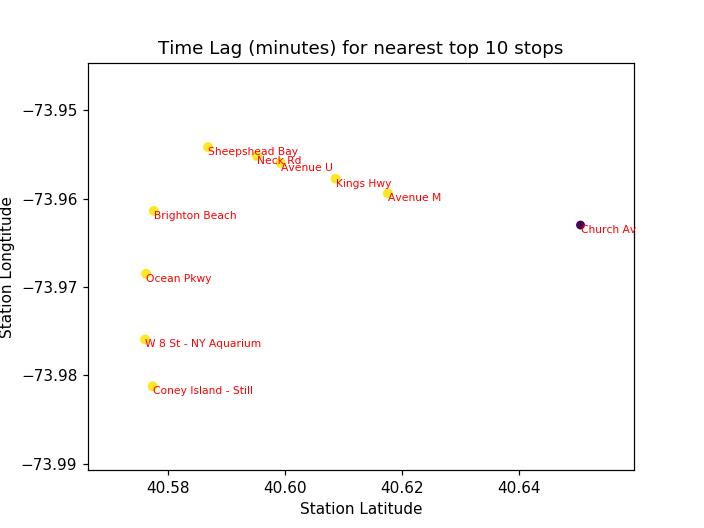

In [26]:
plt.title ('Time Lag (minutes) for nearest top 10 stops')
#plt.scatter (x_lat, x_lon, s = lag_min);

#different color
colors = []
for i in range (10):
    colors . append ( lag_min [i]/float(max(lag_min)))

plt.scatter(x_lat, x_lon ,s = lag_min, c=colors , alpha =1);

#add text
for i in range (10):
    myx = x_lat[i]
    myy = x_lon[i]
    mystop = stop_name [i]
    plt. text (myx , myy , mystop , color ="red", fontsize =7,horizontalalignment='left',verticalalignment='top')
    
# x and y labels
plt.ylabel('Station Longtitude')
plt.xlabel('Station Latitude')

# Save plot as a png. image
plt.savefig('TimeLag.png')

plt.show()

<font size='4' color='blue'>Ling part</font>

In [27]:
# Identify the stop_id that we wish to search
# In this case, we use stop 'Q05N' as the pre-identified stop

id = 'Q05N'

In [28]:
# Find the index that associates with the corresponding stop
index = int(Schedule2.index[Schedule2['stop_id'] == id].values)

# Find the schedule of that stop
times = Schedule2.iloc[index]

# Drop the NAs in the data
y = times.dropna()[3::]

# Set the x-values
x = range(0, len(y), 1)

<IPython.core.display.Javascript object>


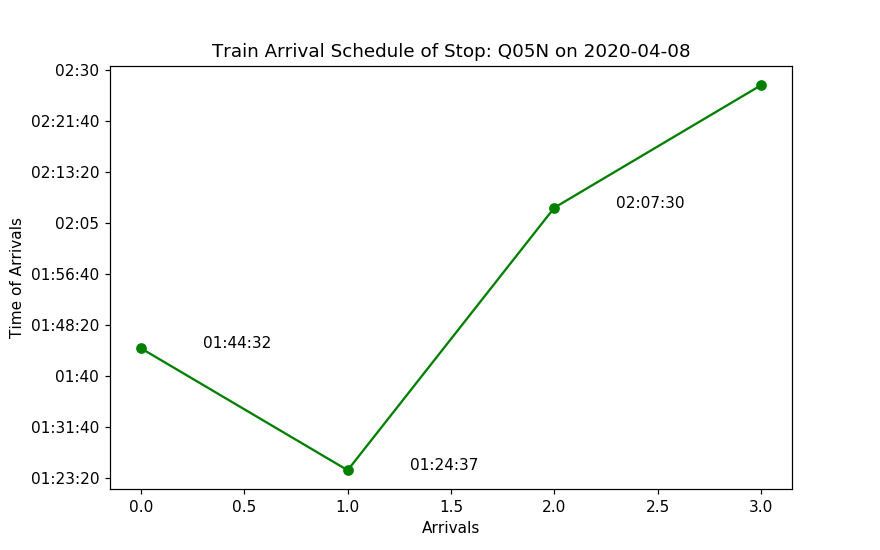

In [29]:
# Plot size
plt.figure(figsize=(8, 5))

# Plot title
plt.title('Train Arrival Schedule of Stop: '+str(id)+' on '+str(times['date']))

# x and y labels
plt.ylabel('Time of Arrivals')
plt.xlabel('Arrivals')

# Line plot
pd.plotting.register_matplotlib_converters()
plt.plot(x, y, 'go-')

# Lable points
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i]+0.3, y[i]))

# Save plot as a png. image
plt.savefig('MTA_Plot1.png')

plt.show()